About the dataset...................
This dataset is a practise problem from Analytics Vidhya - Twitter Sentiment Analysis

Hate Speech in the form of racism and sexism has become a nuisance on twitter and it is important to segregate these sort of tweets from the rest.

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
import re # https://docs.python.org/3/howto/regex.html -- Regular Expressions
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_tweets.csv')
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
combi = train.append(test,ignore_index= True)
combi.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [6]:
# findall function returns the substrings with a particular regular expression
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

Removing phrase '@Users' since it is of no use, for data privacy all usernames are anonymous.

In [7]:
#np.vectorize is function similar to a 'for' loop which recursively calls the function with input array
combi['cleaned_txt'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi.head()

,id,label,tweet,cleaned_txt
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
# Removing Punctuations, special characters, numbers
combi['cleaned_txt'] = combi['cleaned_txt'].str.replace("[^a-zA-Z#]"," ")
combi.head()

,id,label,tweet,cleaned_txt
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [9]:
# Removing short words of word length (<=3)
combi['cleaned_txt'] = combi['cleaned_txt'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,cleaned_txt
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [10]:
# Removing stop words like 'a', 'this', 'an'and other pronouns etc.
stop = set(stopwords.words('english'))
print(stop)
print('#'*127)
combi['cleaned_txt'] = combi['cleaned_txt'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stop]))
combi.head()

{'itself', 'a', 'haven', 've', 'ourselves', 'this', 'been', 'o', 'very', 'himself', "you're", 'some', 'who', 'did', 'after', 'most', 'yours', "should've", 'because', 'further', 'won', 'don', 'him', 'does', 'yourself', "doesn't", 'no', 'has', 'you', 'about', 'hasn', 'do', 'are', 'there', 'what', 'below', 'they', 'with', 'out', 'hers', 'weren', 'during', 'is', "won't", 'will', "couldn't", 'other', 'for', 'down', 'your', 'through', 'aren', 'myself', 'between', 'too', 'while', 'only', 'couldn', 'their', 'yourselves', 'theirs', 'by', 'how', 'just', 'now', "hadn't", 'at', 'am', 'y', "shouldn't", 'whom', 'ours', 'needn', 'to', 'll', 'd', "isn't", 'again', "you'll", 'hadn', 'nor', 'that', 'such', 'as', 'i', 'ain', 'have', 'same', "didn't", 'isn', 'were', 'doing', 'them', 'being', 'all', "you'd", 'mightn', "haven't", 'of', 's', 'ma', 'more', 'an', 'my', 'into', "wouldn't", 'here', 'those', 'few', 'shouldn', 'the', "that'll", 'than', 'didn', 'not', 'own', "she's", 'his', 'wasn', 'be', "you've", 

,id,label,tweet,cleaned_txt
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [11]:
#Tokenisation: Splits the words in sentence
tokened_tweet = combi['cleaned_txt'].apply(lambda x: x.split())
tokened_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: cleaned_txt, dtype: object

In [12]:
# Stemming: Replacing words with its root word
stemmer = PorterStemmer()
tokened_tweet = tokened_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokened_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, caus, offer, wheelchair...
2                                    [bihday, majesti]
3                           [#model, love, take, time]
4                         [factsguid, societi, #motiv]
Name: cleaned_txt, dtype: object

In [13]:
# Detokenisation: Joining the stemmed words back to a sentence
combi['cleaned_txt'] = tokened_tweet.apply(lambda x: ' '.join(x))
combi.head()

,id,label,tweet,cleaned_txt
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


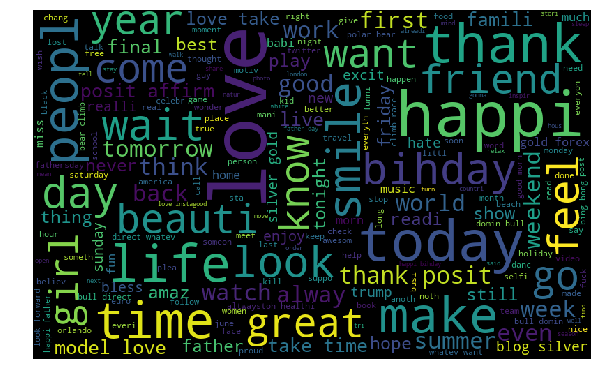

In [14]:
# Building Word Cloud to know the words with many #occurences
all_words =' '.join([word for word in combi['cleaned_txt']])
wordcloud = WordCloud(width=800, height=500, random_state=2, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

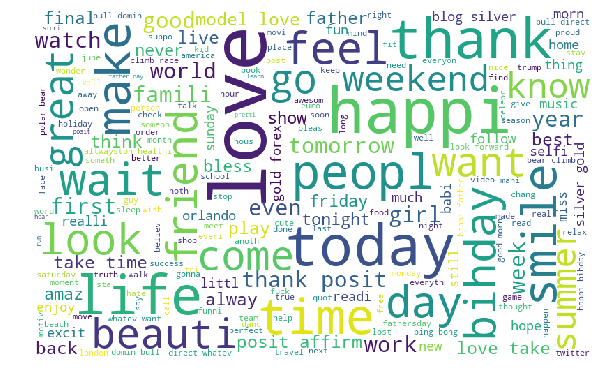

In [15]:
all_positive_words = ' '.join(word for word in combi['cleaned_txt'][combi['label']==0])
wordcloud = WordCloud(width = 800, height = 500, random_state = 2, max_font_size=110,background_color = 'white').generate(all_positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

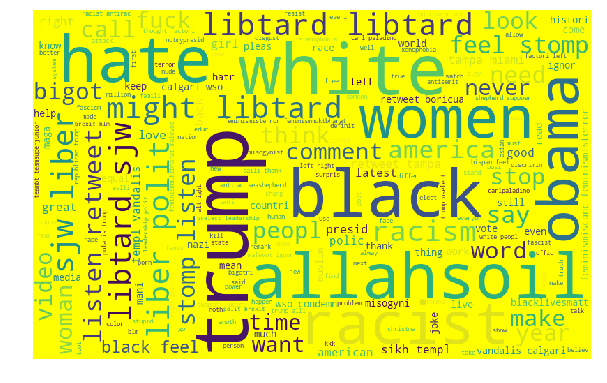

In [16]:
all_hate_words = ' '.join(word for word in combi['cleaned_txt'][combi['label']==1])
wordcloud = WordCloud(width = 800, height = 500, random_state = 2, max_font_size=110,background_color = 'yellow').generate(all_hate_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
def hashtags_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#\w+",i)
        hashtags.append(ht)
    return hashtags

In [18]:
ht_positive = hashtags_extract(combi['cleaned_txt'][combi['label']==0])
ht_negative = hashtags_extract(combi['cleaned_txt'][combi['label']==1])
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])

In [19]:
pos = nltk.FreqDist(ht_positive)
positives = pd.DataFrame({'hashtags':list(pos.keys()),'count': list(pos.values())})

neg = nltk.FreqDist(ht_negative)
negatives = pd.DataFrame({'hashtags':list(neg.keys()),'count': list(neg.values())})

positives = positives.nlargest(columns = 'count',n = 10)
negatives = negatives.nlargest(columns = 'count',n = 10)

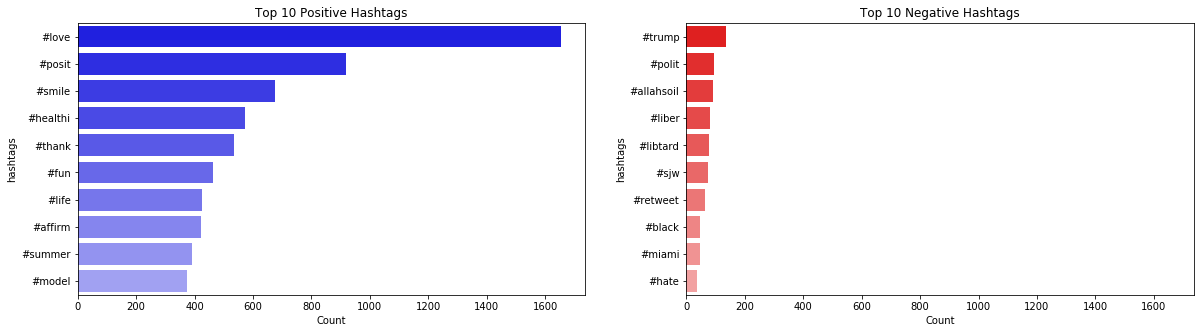

In [20]:
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
sns.barplot(y ='hashtags', x ='count',
            palette = sns.light_palette("blue", n_colors = 15, reverse = True),
            data = positives, 
            ax = axes[0])
axes[0].set(title = "Top 10 Positive Hashtags", xlabel = 'Count')
    
sns.barplot(y ='hashtags', x ='count',
            palette = sns.light_palette("red", n_colors = 15, reverse = True),
            data=negatives, 
            ax=axes[1])
axes[1].set(title="Top 10 Negative Hashtags", xlabel = 'Count')

plt.show()

# Extracting features from Cleaned Text

In [33]:
#  Bag of words featurisation with set min, max document frequencies, max_feature dimension output
count_vec = CountVectorizer(min_df = 2,max_df = 0.9,max_features = 3000)
bow_features = count_vec.fit_transform(combi['cleaned_txt'])

bow_features.shape

(49159, 3000)

In [103]:
# TF-IDF featurisation with set min, max document frequencies, max_features dimension output
tfidf_vec = TfidfVectorizer(min_df = 2, max_df = 0.9, max_features = 5000)
tfidf_features = tfidf_vec.fit_transform(combi['cleaned_txt'])
print(tfidf_vec.get_feature_names())

['aap', 'abandon', 'abil', 'abl', 'aboion', 'abrahamhick', 'abroad', 'absolut', 'abund', 'abus', 'academi', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accomplish', 'accord', 'account', 'accus', 'ace', 'ach', 'achiev', 'acknowledg', 'acn', 'acoust', 'acquaint', 'acquir', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actorslif', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'addict', 'addit', 'address', 'adel', 'adida', 'admin', 'administr', 'admir', 'admit', 'adopt', 'ador', 'adrenalin', 'adult', 'adulteri', 'adv', 'advanc', 'advantag', 'adveis', 'adventur', 'advic', 'advoc', 'affair', 'affect', 'affirm', 'afford', 'afghan', 'afraid', 'africa', 'african', 'after', 'afternoon', 'again', 'age', 'agenc', 'agenda', 'agent', 'aggress', 'agre', 'ahead', 'ahhh', 'ahhhh', 'aicl', 'aim', 'aint', 'air', 'airlin', 'airplan', 'airpo', 'aist', 'alabama', 'alarm', 'alaska', 'albea', 'album', 'alcohol', 'aldub', 'alex', 'alhamdulillah', 'alic', 'alien', 'aliv', '

In [38]:
# Bi-grams and N-grams
ngram_vec = CountVectorizer(ngram_range=(1,2))
ngram_features = ngram_vec.fit_transform(combi['cleaned_txt'])

ngram_features.shape

(49159, 228862)

In [180]:
# tf-idf with word2vec
from gensim.models import Word2Vec

combi['text_wo_stem_stop'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")
combi['text_wo_stem_stop'] = combi['text_wo_stem_stop'].str.replace("[^a-zA-Z]"," ")

list_of_sent = combi['text_wo_stem_stop'].apply(lambda x: x.split())

w2v_model = Word2Vec(list_of_sent,min_count=5,size=50, workers=4) 

tfidf_feat = tfidf_vec.get_feature_names() # super set of all features (5000)
tfidf_sent_vec = []
row=0
for sent in combi['cleaned_txt']:
    sent_vec = np.zeros(50)
    tf_idf_sum = 0
    for word in sent:
       try:
            vec = w2v_model.wv[word] #word2vec for each word 
            tf_idf = tfidf_features[row,tfidf_feat.index(word)] #tfidf vector for each word 
            sent_vec += (vec*tf_idf)
            tf_idf_sum += tf_idf
       except:
           pass
    sent_vec /= tf_idf_sum
    tfidf_sent_vec.append(sent_vec)
    row += 1

In [168]:
## Model Building on TFIDF-W2V features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

tr_tfidfw2v_features = tfidf_sent_vec[:train.shape[0],:]
ts_tfidfw2v_features = tfidf_sent_vec[train.shape[0]:,:]

xtrain_tfidfw2v, xvalid_tfidfw2v, ytrain, yvalid =  train_test_split(tr_tfidfw2v_features,train['label'], random_state = 3, test_size = 0.2)

lreg = LogisticRegression()
lreg.fit(xtrain_tfidfw2v, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_tfidfw2v) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score


ts_pred = lreg.predict_proba(ts_tfidfw2v_features)
ts_pred = ts_pred[:,1] >= 0.3
ts_pred = ts_pred.astype(np.int)

test['label'] = ts_pred

submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidfw2v.csv', index=False) 



TypeError: list indices must be integers or slices, not tuple

In [159]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(tfidf_features[1,:].toarray()[0],tfidf_feat,25)

In [167]:
tfidf_sent_vec

[array([ 2.14161256e-01,  9.07132614e-01, -2.20042466e-01, -8.45284954e-02,
         3.31801936e-01, -1.19174165e-01,  1.35768715e-01,  7.36950180e-01,
         6.44785029e-01,  1.09406333e+00, -6.67606396e-02, -6.88176545e-01,
        -2.02690426e-01,  3.51494502e-02,  3.75853782e-01,  6.21821577e-01,
         1.70428702e-02,  3.32170168e-01, -4.63598307e-01,  1.95408679e-01,
         2.68638236e-01,  6.85470692e-01, -1.27388533e-01, -7.12236849e-01,
         4.48164072e-01,  5.49045283e-01, -6.63828270e-01,  1.50514065e-01,
        -6.10942634e-02, -7.64781834e-02, -7.56374343e-01,  1.57536920e-01,
        -2.17635363e-01, -1.02482562e-01, -8.48456529e-01,  1.95982620e-01,
        -3.16651803e-01,  1.43385816e-01,  2.61322179e-01, -5.29464817e-02,
         2.57106438e-01, -1.52055161e-01, -7.70377510e-01, -5.75094811e-01,
        -3.96264772e-03, -1.55917193e-01,  4.88202906e-02, -2.43105499e-04,
         1.08714052e-01,  8.93658988e-02]),
 array([ 0.26055714,  0.10876843,  0.1532217

In [181]:
tfidf_sent_vec[1:3]

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])]

In [82]:
words = list(w2v_model.wv.vocab)
print(len(words))
w2v_model.most_similar('hate')

8471


[('wotching', 0.830446183681488),
 ('understand', 0.8295975923538208),
 ('gun', 0.8290397524833679),
 ('kill', 0.8265560865402222),
 ('ppl', 0.8254407644271851),
 ('americans', 0.8158797025680542),
 ('saying', 0.8097320199012756),
 ('stupid', 0.8056515455245972),
 ('why', 0.805070161819458),
 ('mean', 0.8009011745452881)]

In [56]:
## Model Building on Bag of Words features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

tr_bow_features = bow_features[:train.shape[0],:]
ts_bow_features = bow_features[train.shape[0]:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid =  train_test_split(tr_bow_features,train['label'], random_state = 3, test_size = 0.2)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score


ts_pred = lreg.predict_proba(ts_bow_features)
ts_pred = ts_pred[:,1] >= 0.3
ts_pred = ts_pred.astype(np.int)

test['label'] = ts_pred

submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) 



0.6778042959427206

In [61]:
## Model Building on TF-IDF features

tr_tfidf_features = tfidf_features[:train.shape[0],:]
ts_tfidf_features = tfidf_features[train.shape[0]:,:]

xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tr_tfidf_features,train['label'],random_state = 3, test_size = 0.2)

lreg = LogisticRegression()
lreg.fit(xtrain_tfidf,ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid,prediction_int)

ts_pred = lreg.predict_proba(ts_tfidf_features)
ts_pred = ts_pred[:,1] >= 0.3
ts_pred = ts_pred.astype(np.int)

test['label'] = ts_pred

submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index = False)